# CAB420 Assignment 1A Question 1: Template
Simon Denman (s.denman@qut.edu.au)

## Overview



Import all dependencies and then convert the three data sets into training, testing and validation.

In [74]:
import pandas
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

train = pandas.read_csv('./Q1/communities_train.csv')
val = pandas.read_csv('./Q1/communities_val.csv')
test = pandas.read_csv('./Q1/communities_test.csv')

# Standardise
train_mu = train.mean()
train_sigma = train.std()
train_std = (train - train_mu) / train_sigma

test_mu = test.mean()
test_sigma = test.std()
test_std = (test - test_mu) / test_sigma

val_mu = val.mean()
val_sigma = val.std()
val_std = (val - val_mu) / val_sigma


train.columns = train.columns.str.strip()



In [75]:
X_train = train_std.iloc[:,0:-1]
y_train = train_std.iloc[:,-1]
X_val = val_std.iloc[:,0:-1]
y_val = val_std.iloc[:,-1]
X_test = test_std.iloc[:,0:-1]
y_test = test_std.iloc[:,-1]


list(train.keys())
keys = ' + '.join(list(train.keys()))
train.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.01,0.33,0.00,0.94,0.21,0.11,0.26,0.37,0.22,0.74,...,0.44,0.73,0.90,0.73,0.85,0.01,0.45,0.47,0.0,0.06
1,0.01,0.09,0.02,0.89,0.23,0.13,0.07,0.71,0.27,0.15,...,0.24,0.37,0.25,0.46,0.34,0.00,1.00,0.06,0.0,0.22
2,0.01,0.53,0.02,0.92,0.21,0.03,0.98,1.00,1.00,0.20,...,0.17,0.32,0.13,0.04,0.18,0.01,0.32,0.01,0.0,0.07
3,0.01,0.36,0.00,0.98,0.02,0.00,0.42,0.45,0.29,0.53,...,0.01,0.81,0.50,0.65,0.76,0.04,0.11,0.00,0.0,0.07
4,0.01,0.68,0.01,0.98,0.04,0.01,0.71,0.60,0.62,0.39,...,0.10,0.71,0.67,0.73,0.55,0.08,0.06,0.07,0.0,0.03


Text(0.5, 1.0, 'Total Crimes per pop over time')

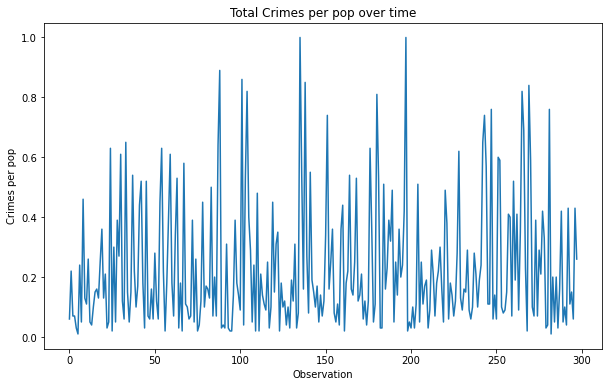

In [76]:
# Make a plot to show the cirmes per pop data

fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(1, 1, 1)
ax.plot(train['ViolentCrimesPerPop'])
ax.set_xlabel('Observation')
ax.set_ylabel('Crimes per pop')
ax.set_title('Total Crimes per pop over time')

Not a fat lot of fucking correlation that I can see but I'll work with it.

Next, time to create some scatters so we can see what's going on with some correlations.

Text(0.5, 1.0, '0.22443198650479113')

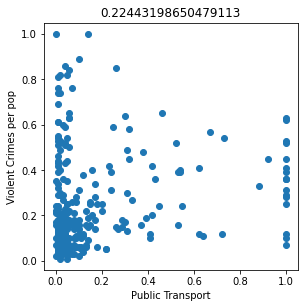

In [118]:
fig = plt.figure(figsize=[10, 10])

ax = fig.add_subplot(2, 2, 1)
ax.scatter(train['racePctHisp'], train['ViolentCrimesPerPop'])
ax.set_xlabel('Public Transport')
ax.set_ylabel('Violent Crimes per pop')
ax.set_title(str(train['ViolentCrimesPerPop'].corr(train['racePctHisp'])))


In [78]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(298, 100)
(298,)
(298, 100)
(298,)
(299, 100)
(299,)


In [95]:
model = sm.OLS(y_train, X_train)
trained_model = model.fit()
print(trained_model.summary())

# linear = LinearRegression(fit_intercept = False).fit(X = X_train.to_numpy(), y = y_train.to_numpy())


# fig = plt.figure(figsize=[25, 16])
# ax = fig.add_subplot(4, 1, 1)
# ax.bar(range(len(linear.coef_)), linear.coef_)
# ax.set_title('Coefficients')

# ax = fig.add_subplot(4, 1, 2)
# ax.plot(linear.predict(X_train.values), label='Predicted')
# ax.plot(y_train, label='Actual')
# ax.set_title('Training Data')
# ax.legend()

# ax = fig.add_subplot(4, 1, 3)
# ax.plot(linear.predict(X_val.values), label='Predicted')
# ax.plot(y_val.to_numpy(), label='Actual')
# ax.set_title('Validation Data')
# ax.legend()

# ax = fig.add_subplot(4, 1, 4)
# ax.plot(linear.predict(X_test.values), label='Predicted')
# ax.plot(y_test.to_numpy(), label='Actual')
# ax.set_title('Testing Data')
# ax.legend();

                                  OLS Regression Results                                  
Dep. Variable:      ViolentCrimesPerPop    R-squared (uncentered):                   0.759
Model:                               OLS   Adj. R-squared (uncentered):              0.637
Method:                    Least Squares   F-statistic:                              6.239
Date:                   Thu, 23 Mar 2023   Prob (F-statistic):                    4.63e-28
Time:                           14:40:50   Log-Likelihood:                         -210.27
No. Observations:                    298   AIC:                                      620.5
Df Residuals:                        198   BIC:                                      990.2
Df Model:                            100                                                  
Covariance Type:               nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975

In [ ]:
Finding the most influential P values from the above model

In [114]:
counter = 0
for p in trained_model.pvalues:
    
    if(p < 0.05):
        print(trained_model.pvalues.keys()[counter])
        print(trained_model.pvalues[counter])
        counter = counter + 1

 racePctHisp 
0.014352977011626874
 PctRecImmig8 
0.041691332640010396
 PctLargHouseFam 
0.04125303366679608
 PctLargHouseOccup 
0.03450647333400608
 PersPerOccupHous 
0.0048280783472628725
 PopDens 
0.03192565182373645


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 1.811e+27
Date:                 Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                         13:52:02   Log-Likelihood:                 9292.0
No. Observations:                  298   AIC:                        -1.838e+04
Df Residuals:                      196   BIC:                        -1.800e+04
Df Model:                          101                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept           